<a href="https://colab.research.google.com/github/kanishkagargg/Codebasics_8_MitronBank/blob/main/Codebasics_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MITRON BANK CREDIT CARD ANALYSIS

This project based on a challenge organized by Codebasics.

I have used following tools to complete this project:

  1) Python

  2) Tableau
  
  3) Microsoft PowerPoint
    
In this project, Mitron Bank, a well-established financial institution headquartered in Hyderabad, is keen on expanding its product offerings and market presence by launching a new line of credit cards. AtliQ Data Services became aware of this initiative through an internal link and approached Mitron Bank with a proposal to execute the project. However, Mr. Bashnir Rover, the strategy director at Mitron Bank, expressed skepticism and requested a pilot project with the sample data before entrusting them with the full-scale implementation.

In response to this, Mitron Bank provided a sample dataset featuring information from 4000 customers across five different cities, encompassing details about their online spending and other relevant information. The objective is to conduct a comprehensive analysis of this provided sample data and present key findings to Mitron Bank's strategy team. The insights derived from this analysis are anticipated to serve as valuable guidance for tailoring the new credit cards to align with customer needs and prevailing market trends.  

In [1]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 964.5 kB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
Spending_data = pd.read_csv('/content/drive/MyDrive/Codebasics #8/fact_spends.csv',encoding="ISO-8859-1")
Customer_data = pd.read_csv('/content/drive/MyDrive/Codebasics #8/dim_customers.csv',encoding="ISO-8859-1")

In [5]:
Spending_data.shape

(864000, 5)

In [6]:
Customer_data.shape

(4000, 7)

In [7]:
Avg_Income = Customer_data['avg_income']
Customer_data['Income_Range'] = pd.cut(x = Avg_Income, bins=[20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000],
                     labels=['20000-30000', '30000-40000', '40000-50000',
                             '50000-60000','60000-70000', '70000-80000', '80000-90000'])
print(Customer_data['Income_Range'].value_counts())

30000-40000    1062
60000-70000    1046
40000-50000     723
50000-60000     505
70000-80000     427
20000-30000     188
80000-90000      49
Name: Income_Range, dtype: int64


In [8]:
Combined_data = pd.merge(Spending_data,Customer_data, on = 'customer_id' )

In [9]:
Combined_data.head()

,customer_id,month,category,payment_type,spend,age_group,city,occupation,gender,marital status,avg_income,Income_Range
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000
1,ATQCUS1371,May,Bills,UPI,787,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000
2,ATQCUS1371,September,Bills,Net Banking,1022,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000
3,ATQCUS1371,September,Bills,UPI,1942,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000
4,ATQCUS1371,August,Electronics,Credit Card,1865,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000


In [10]:
Combined_data.set_index('payment_type')

,customer_id,month,category,spend,age_group,city,occupation,gender,marital status,avg_income,Income_Range
payment_type,,,,,,,,,,,
Credit Card,ATQCUS1371,July,Health & Wellness,1114,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000
UPI,ATQCUS1371,May,Bills,787,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000
Net Banking,ATQCUS1371,September,Bills,1022,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000
UPI,ATQCUS1371,September,Bills,1942,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000
Credit Card,ATQCUS1371,August,Electronics,1865,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000
...,...,...,...,...,...,...,...,...,...,...,...
Net Banking,ATQCUS0890,October,Groceries,764,35-45,Mumbai,Salaried IT Employees,Male,Married,65187,60000-70000
Debit Card,ATQCUS0890,September,Health & Wellness,1188,35-45,Mumbai,Salaried IT Employees,Male,Married,65187,60000-70000
UPI,ATQCUS0890,September,Electronics,2786,35-45,Mumbai,Salaried IT Employees,Male,Married,65187,60000-70000


In [11]:
Credit_Card_Data = pd.DataFrame(Combined_data[Combined_data['payment_type'] == 'Credit Card'])

Credit_Card_Data.head()

,customer_id,month,category,payment_type,spend,age_group,city,occupation,gender,marital status,avg_income,Income_Range
0,ATQCUS1371,July,Health & Wellness,Credit Card,1114,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000
4,ATQCUS1371,August,Electronics,Credit Card,1865,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000
6,ATQCUS1371,October,Others,Credit Card,280,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000
13,ATQCUS1371,September,Health & Wellness,Credit Card,1161,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000
15,ATQCUS1371,July,Entertainment,Credit Card,544,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000


In [12]:
Non_Credit_Card_Data = pd.DataFrame(Combined_data[Combined_data['payment_type'] != 'Credit Card'])

Non_Credit_Card_Data.head()

,customer_id,month,category,payment_type,spend,age_group,city,occupation,gender,marital status,avg_income,Income_Range
1,ATQCUS1371,May,Bills,UPI,787,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000
2,ATQCUS1371,September,Bills,Net Banking,1022,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000
3,ATQCUS1371,September,Bills,UPI,1942,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000
5,ATQCUS1371,October,Travel,Net Banking,149,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000
7,ATQCUS1371,August,Travel,Net Banking,186,35-45,Chennai,Salaried IT Employees,Male,Married,64696,60000-70000


In [13]:
Combined_data.isnull().sum()

customer_id       0
month             0
category          0
payment_type      0
spend             0
age_group         0
city              0
occupation        0
gender            0
marital status    0
avg_income        0
Income_Range      0
dtype: int64

In [14]:
len(Combined_data[Combined_data.duplicated()])

0

In [15]:
for i in Combined_data.columns.tolist():
  print("No. of unique values in ",i,"is",Combined_data[i].nunique(),".")

No. of unique values in  customer_id is 4000 .
No. of unique values in  month is 6 .
No. of unique values in  category is 9 .
No. of unique values in  payment_type is 4 .
No. of unique values in  spend is 5744 .
No. of unique values in  age_group is 4 .
No. of unique values in  city is 5 .
No. of unique values in  occupation is 5 .
No. of unique values in  gender is 2 .
No. of unique values in  marital status is 2 .
No. of unique values in  avg_income is 3819 .
No. of unique values in  Income_Range is 7 .


In [16]:
Combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 864000 entries, 0 to 863999
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   customer_id     864000 non-null  object  
 1   month           864000 non-null  object  
 2   category        864000 non-null  object  
 3   payment_type    864000 non-null  object  
 4   spend           864000 non-null  int64   
 5   age_group       864000 non-null  object  
 6   city            864000 non-null  object  
 7   occupation      864000 non-null  object  
 8   gender          864000 non-null  object  
 9   marital status  864000 non-null  object  
 10  avg_income      864000 non-null  int64   
 11  Income_Range    864000 non-null  category
dtypes: category(1), int64(2), object(9)
memory usage: 79.9+ MB


In [17]:
Combined_data.describe()

,spend,avg_income
count,864000.000000,864000.000000
mean,614.464994,51657.032250
std,661.571676,14688.312762
min,6.000000,24816.000000
25%,191.000000,38701.000000
50%,395.000000,50422.000000
75%,793.000000,64773.250000
max,10313.000000,86600.000000


In [18]:
cat_columns1 = ['marital status','age_group', 'city', 'occupation', 'gender']
cat_columns2 = ['category','payment_type']

<Axes: xlabel='avg_income', ylabel='Count'>

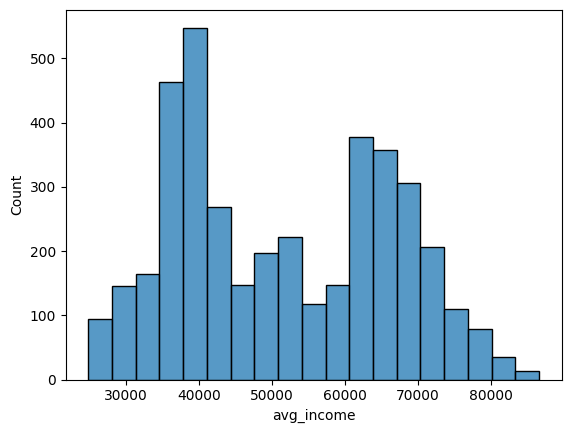

In [19]:
sns.histplot(data=Customer_data, x='avg_income')

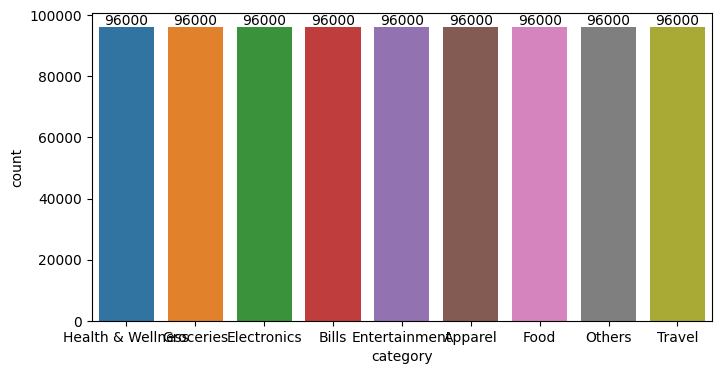

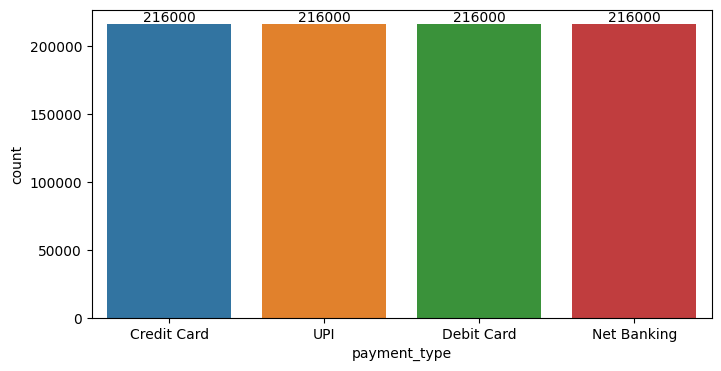

In [20]:
for category in cat_columns2:
  plt.figure(figsize=(8,4))
  ax = sns.countplot(data=Spending_data, x=category)
  for bars in ax.containers:
    ax.bar_label(bars)

1) Count of different categories is unifrom which is 96,000.

2) Count of different payment methods is also uniform which is 2,16,000.

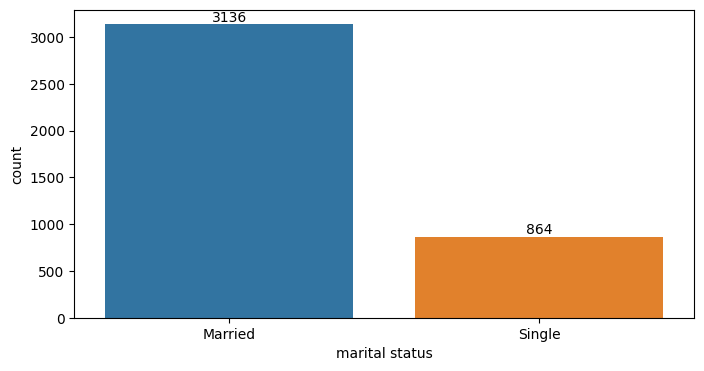

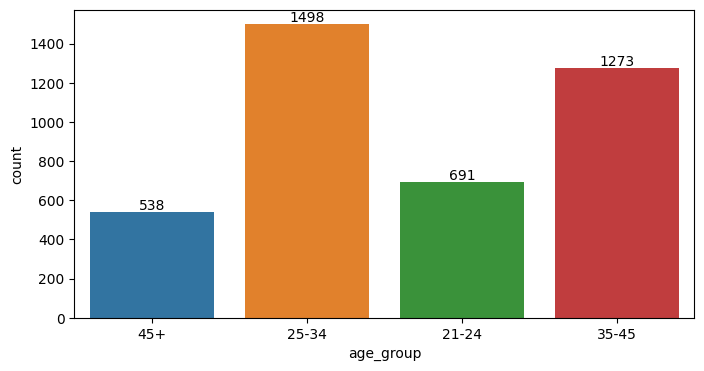

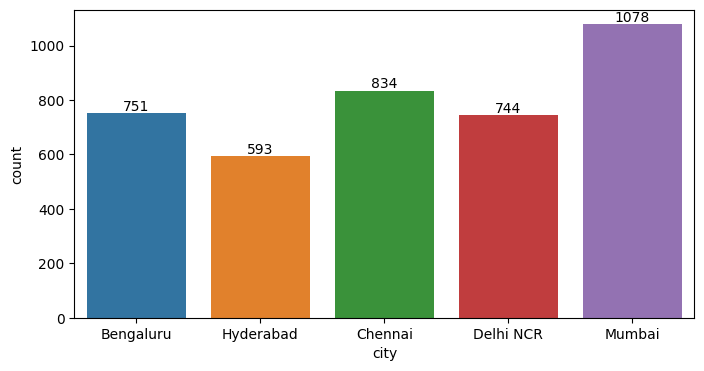

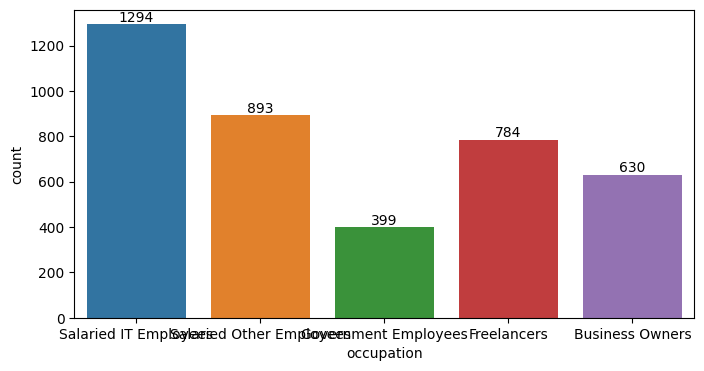

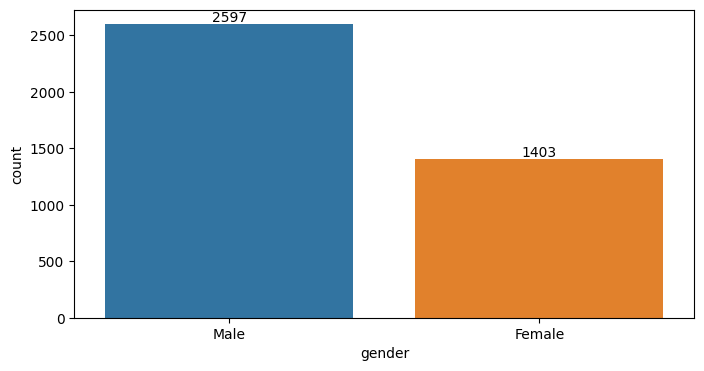

In [21]:
for category in cat_columns1:
  plt.figure(figsize=(8,4))
  ax = sns.countplot(data=Customer_data, x=category)
  for bars in ax.containers:
    ax.bar_label(bars)

1) Married users are frequent than singles.

2) People with age group of 25-34 and 35-45 make more payemnts with 45+ making the lowest.

3) From Mumbai, their were the maximum number of payments were made, followed by Chennai and Bengaluru.

4) Salaried IT and other Salaried employees made maximum payments. Freelancers made the third highest payments.

5) Male made more frequent purchases than women.

<Axes: xlabel='spend', ylabel='Count'>

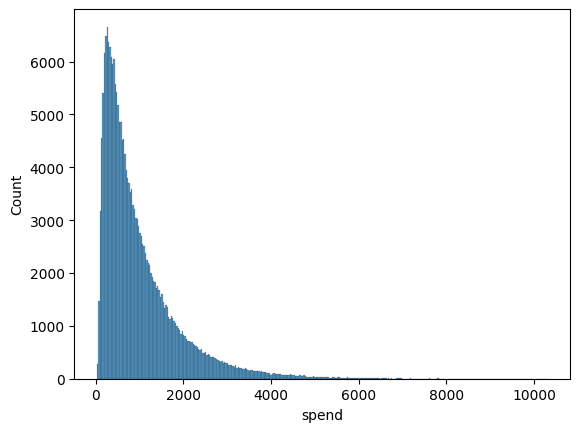

In [22]:
sns.histplot(data=Credit_Card_Data, x='spend')

<Axes: xlabel='spend', ylabel='Count'>

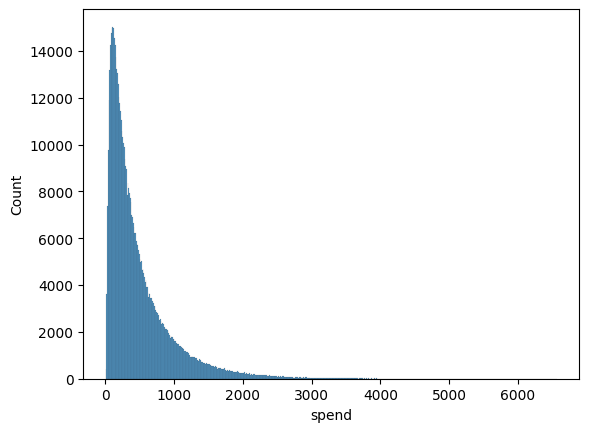

In [23]:
sns.histplot(data=Non_Credit_Card_Data, x='spend')

Maximum users use credit cards for the payments till 2000. While these users use other payment options for the payments till 1000.

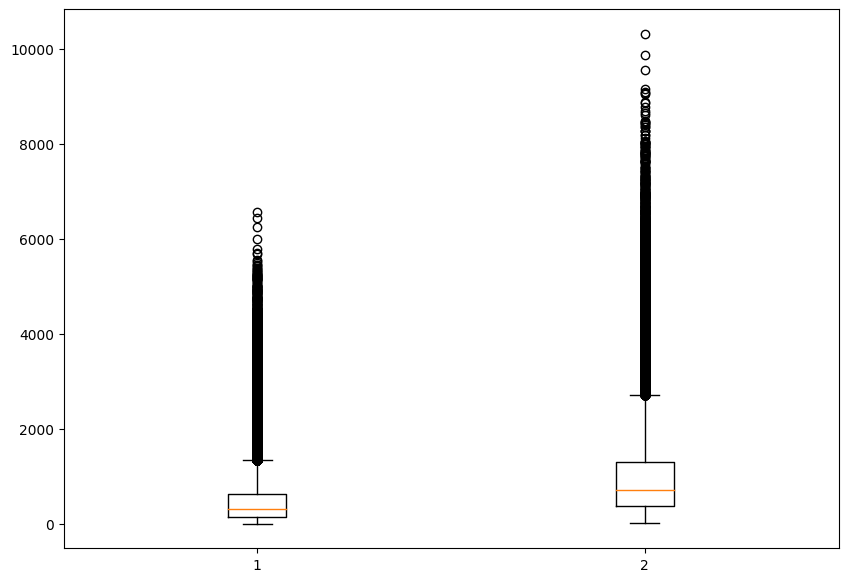

In [24]:
fig = plt.figure(figsize =(10, 7))
ax = fig.add_subplot(111)
bp = ax.boxplot([Non_Credit_Card_Data['spend'], Credit_Card_Data['spend']])
plt.show()

There are many outliers present in spends but we will choose not to remove them as they are important to know the purchasing patterns and potential customers.

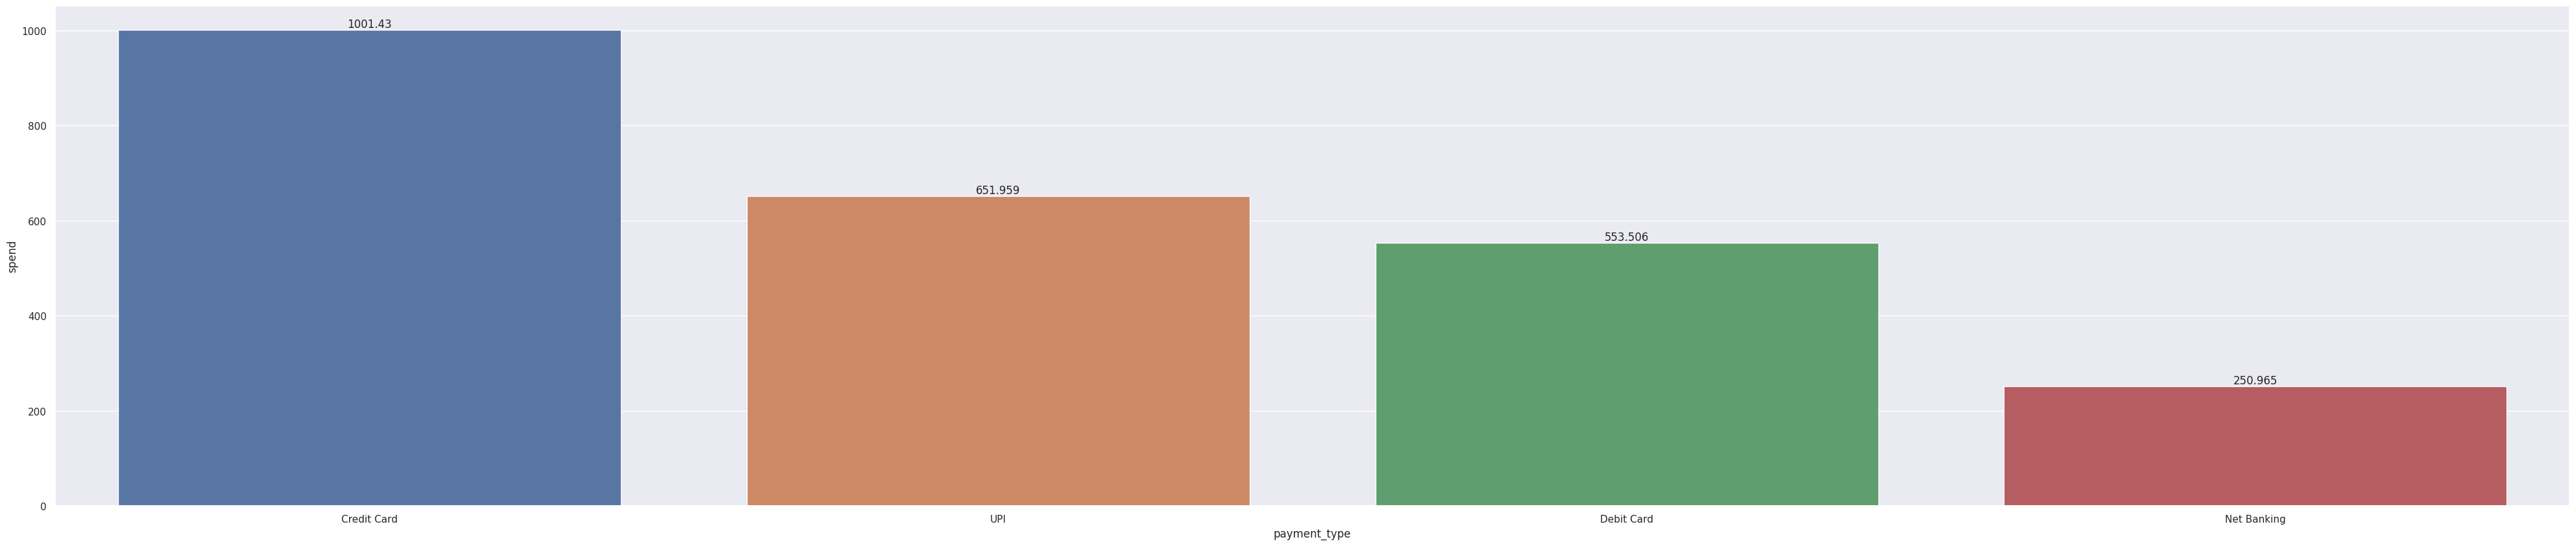

In [25]:
pay_spend = Combined_data.groupby(['payment_type'], as_index=False)['spend'].mean().sort_values(by='spend', ascending=False)

# Setting size of the chart
sns.set(rc={'figure.figsize':(50,10)})

# Visualizing the sum of prices to be paid for paid apps in each category.
ax = sns.barplot(x = 'payment_type',y= 'spend' ,data = pay_spend)

# Mentioning bar graph count on each graph
for bars in ax.containers:
    ax.bar_label(bars)

Mean spend by Credit cards is 1001 being the highest, by UPI is 652, by Debit card is 553 and by Net banking is 250.

<Axes: xlabel='spend', ylabel='avg_income'>

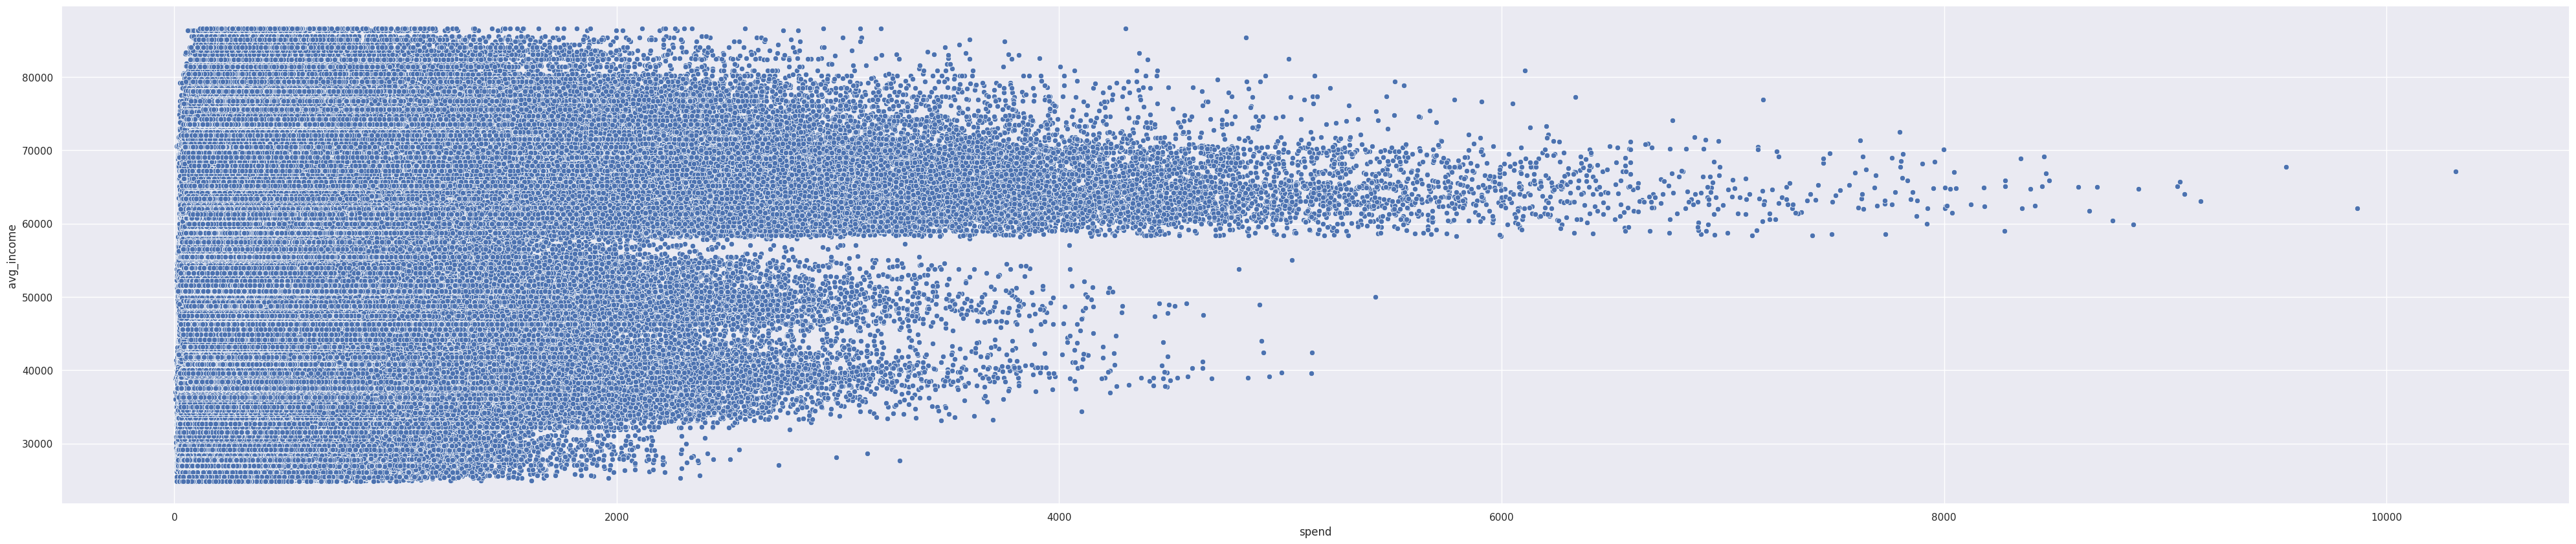

In [26]:
sns.scatterplot(x='spend', y='avg_income', data = Combined_data)

From this chart we can infer that:

1) Payments till 2500 is done by all income groups.

2) Maximum people with income of 30,000 usually did payment of amount till 2500.

3) Maximum people with income of 30,000 - 60,000 and 75,000 - 805,000 usually did payment of amount till 4000.

4) Maximum people with income of more that 60,000 and below 75,000 usually did payment of amount till 9000 which is the highest as compared to other income groups.

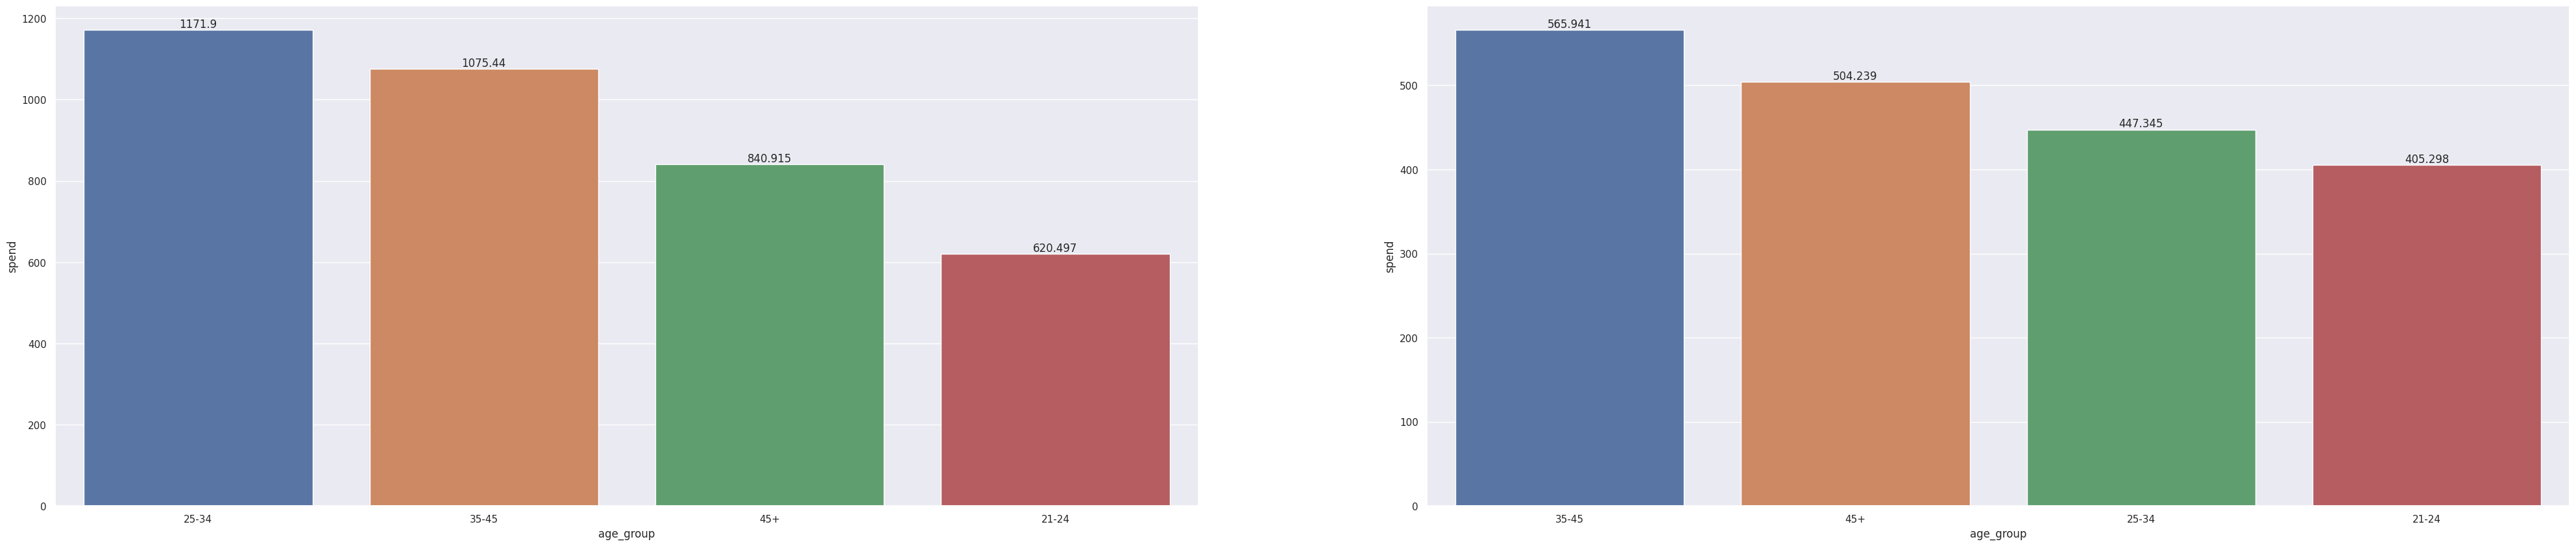

In [27]:
plt.subplot(1, 2, 1)
sns.set(rc={'figure.figsize':(30,10)})
age_spend = Credit_Card_Data.groupby(['age_group'], as_index=False)['spend'].mean().sort_values(by='spend', ascending=False)
ax = sns.barplot(x = 'age_group', y= 'spend' ,data = age_spend)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(1, 2, 2)
sns.set(rc={'figure.figsize':(30,10)})
age_spend = Non_Credit_Card_Data.groupby(['age_group'], as_index=False)['spend'].mean().sort_values(by='spend', ascending=False)
ax = sns.barplot(x = 'age_group', y= 'spend' ,data = age_spend)
for bars in ax.containers:
    ax.bar_label(bars)

First chart shows average amount spent by each age group via Credit cards while right one shows via other payment methods.

In Credit card payments, age group of 25-34 spends the maximum average amount of 1171 followed by 35-45 with the amount of 1075.

In Non-Credit card payments, age group of 35-45 spends the maximum average amount of 566 followed by 45+ with the amount of 504.

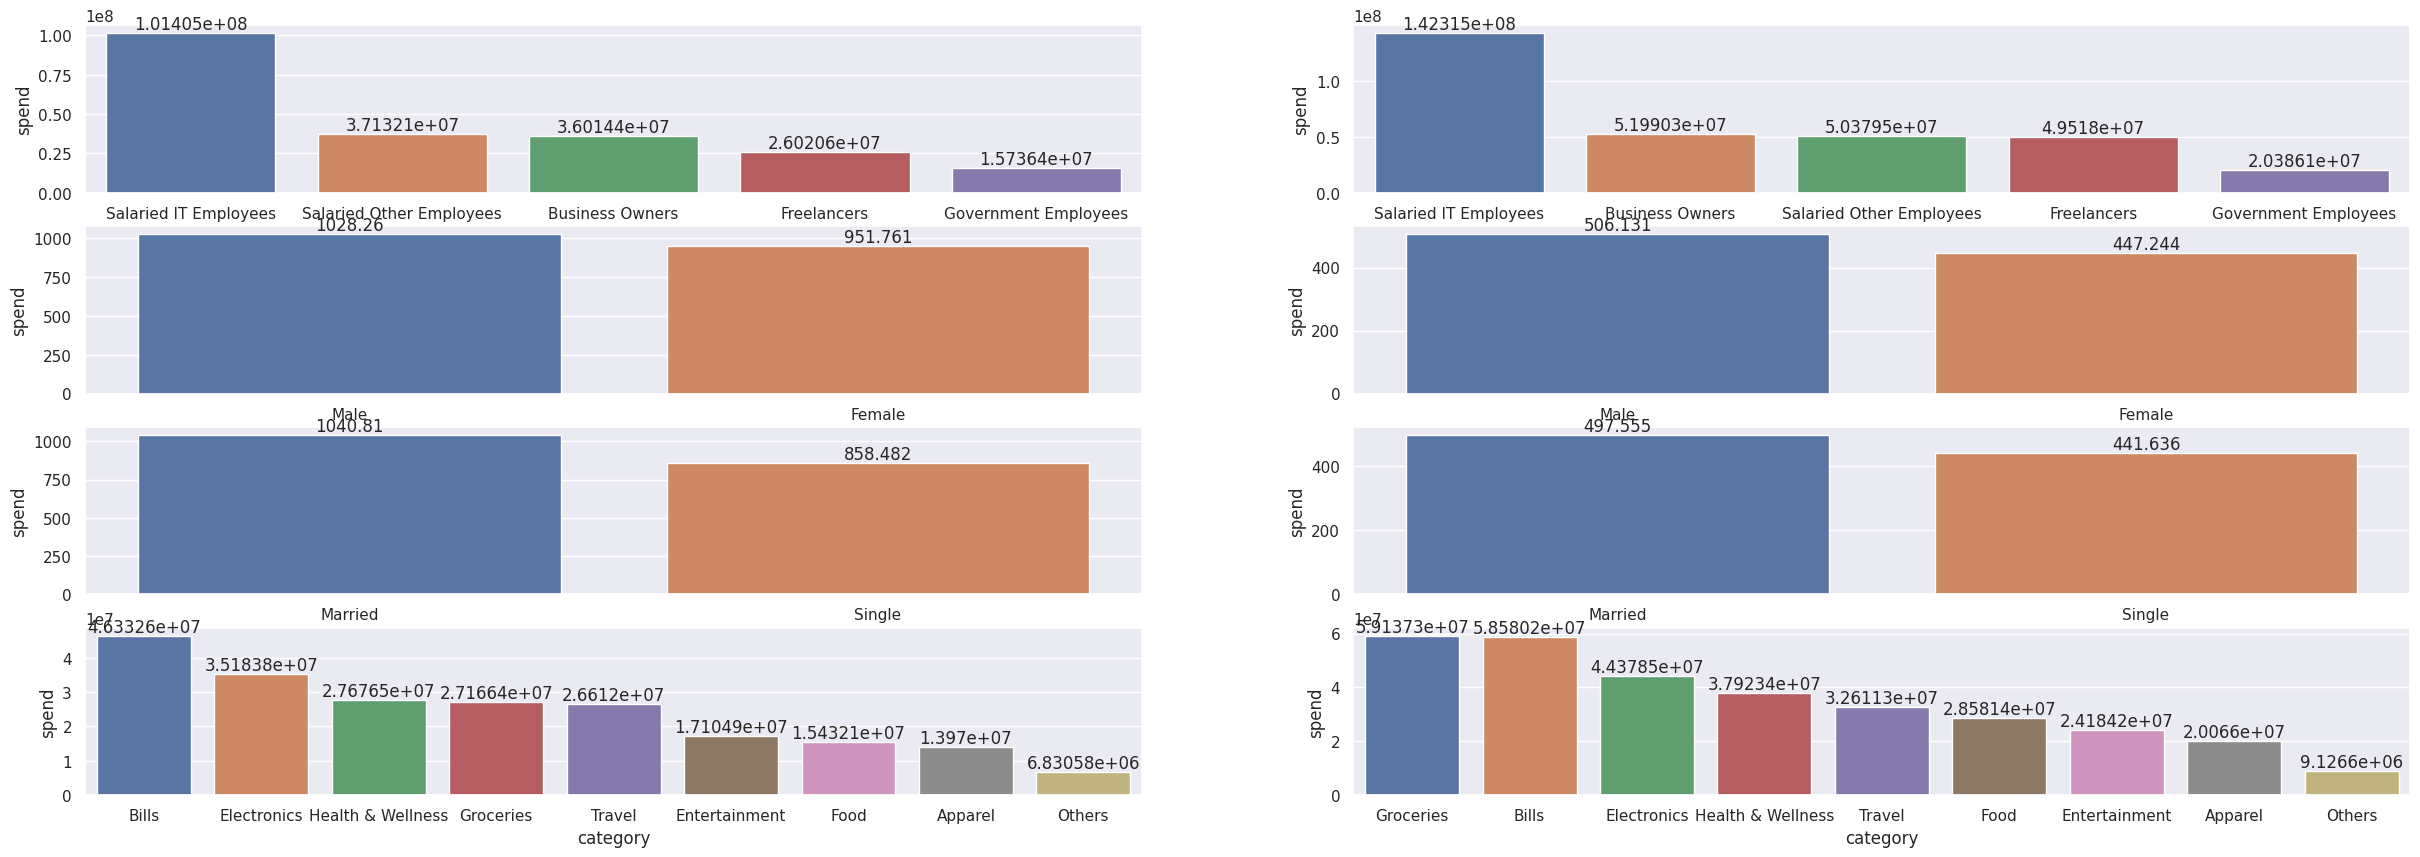

In [28]:
plt.subplot(4, 2, 1)
sns.set(rc={'figure.figsize':(30,10)})
occ_spend = Credit_Card_Data.groupby(['occupation'], as_index=False)['spend'].sum().sort_values(by='spend', ascending=False)
ax = sns.barplot(x = 'occupation', y= 'spend' ,data = occ_spend)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(4, 2, 2)
sns.set(rc={'figure.figsize':(30,10)})
occ_spend = Non_Credit_Card_Data.groupby(['occupation'], as_index=False)['spend'].sum().sort_values(by='spend', ascending=False)
ax = sns.barplot(x = 'occupation', y= 'spend' ,data = occ_spend)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(4, 2, 3)
sns.set(rc={'figure.figsize':(30,10)})
gen_spend = Credit_Card_Data.groupby(['gender'], as_index=False)['spend'].mean().sort_values(by='spend', ascending=False)
ax = sns.barplot(x = 'gender', y= 'spend' ,data = gen_spend)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(4, 2, 4)
sns.set(rc={'figure.figsize':(30,10)})
gen_spend = Non_Credit_Card_Data.groupby(['gender'], as_index=False)['spend'].mean().sort_values(by='spend', ascending=False)
ax = sns.barplot(x = 'gender', y= 'spend' ,data = gen_spend)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(4, 2, 5)
sns.set(rc={'figure.figsize':(30,10)})
marr_spend = Credit_Card_Data.groupby(['marital status'], as_index=False)['spend'].mean().sort_values(by='spend', ascending=False)
ax = sns.barplot(x = 'marital status', y= 'spend' ,data = marr_spend)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(4, 2, 6)
sns.set(rc={'figure.figsize':(30,10)})
marr_spend = Non_Credit_Card_Data.groupby(['marital status'], as_index=False)['spend'].mean().sort_values(by='spend', ascending=False)
ax = sns.barplot(x = 'marital status', y= 'spend' ,data = marr_spend)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(4, 2, 7)
sns.set(rc={'figure.figsize':(30,10)})
cat_spend = Credit_Card_Data.groupby(['category'], as_index=False)['spend'].sum().sort_values(by='spend', ascending=False)
ax = sns.barplot(x = 'category', y= 'spend' ,data = cat_spend)
for bars in ax.containers:
    ax.bar_label(bars)

plt.subplot(4, 2, 8)
sns.set(rc={'figure.figsize':(30,10)})
cat_spend = Non_Credit_Card_Data.groupby(['category'], as_index=False)['spend'].sum().sort_values(by='spend', ascending=False)
ax = sns.barplot(x = 'category', y= 'spend' ,data = cat_spend)
for bars in ax.containers:
    ax.bar_label(bars)

Average spent by male and females is similar for both with credit card payments is of approx 1000 and non credit card payemnts of 500.

Average spent by married and single users is similar for both with credit card payments is ranges from 800-1000 and non credit card payemnts of 450.

Total credit card payments are maximum in the category of Bills, followed by Electronics, Health and Groceries. Total non-credit card payments are maximum in the category of Groceries, followed by Bills Electronics, Health.


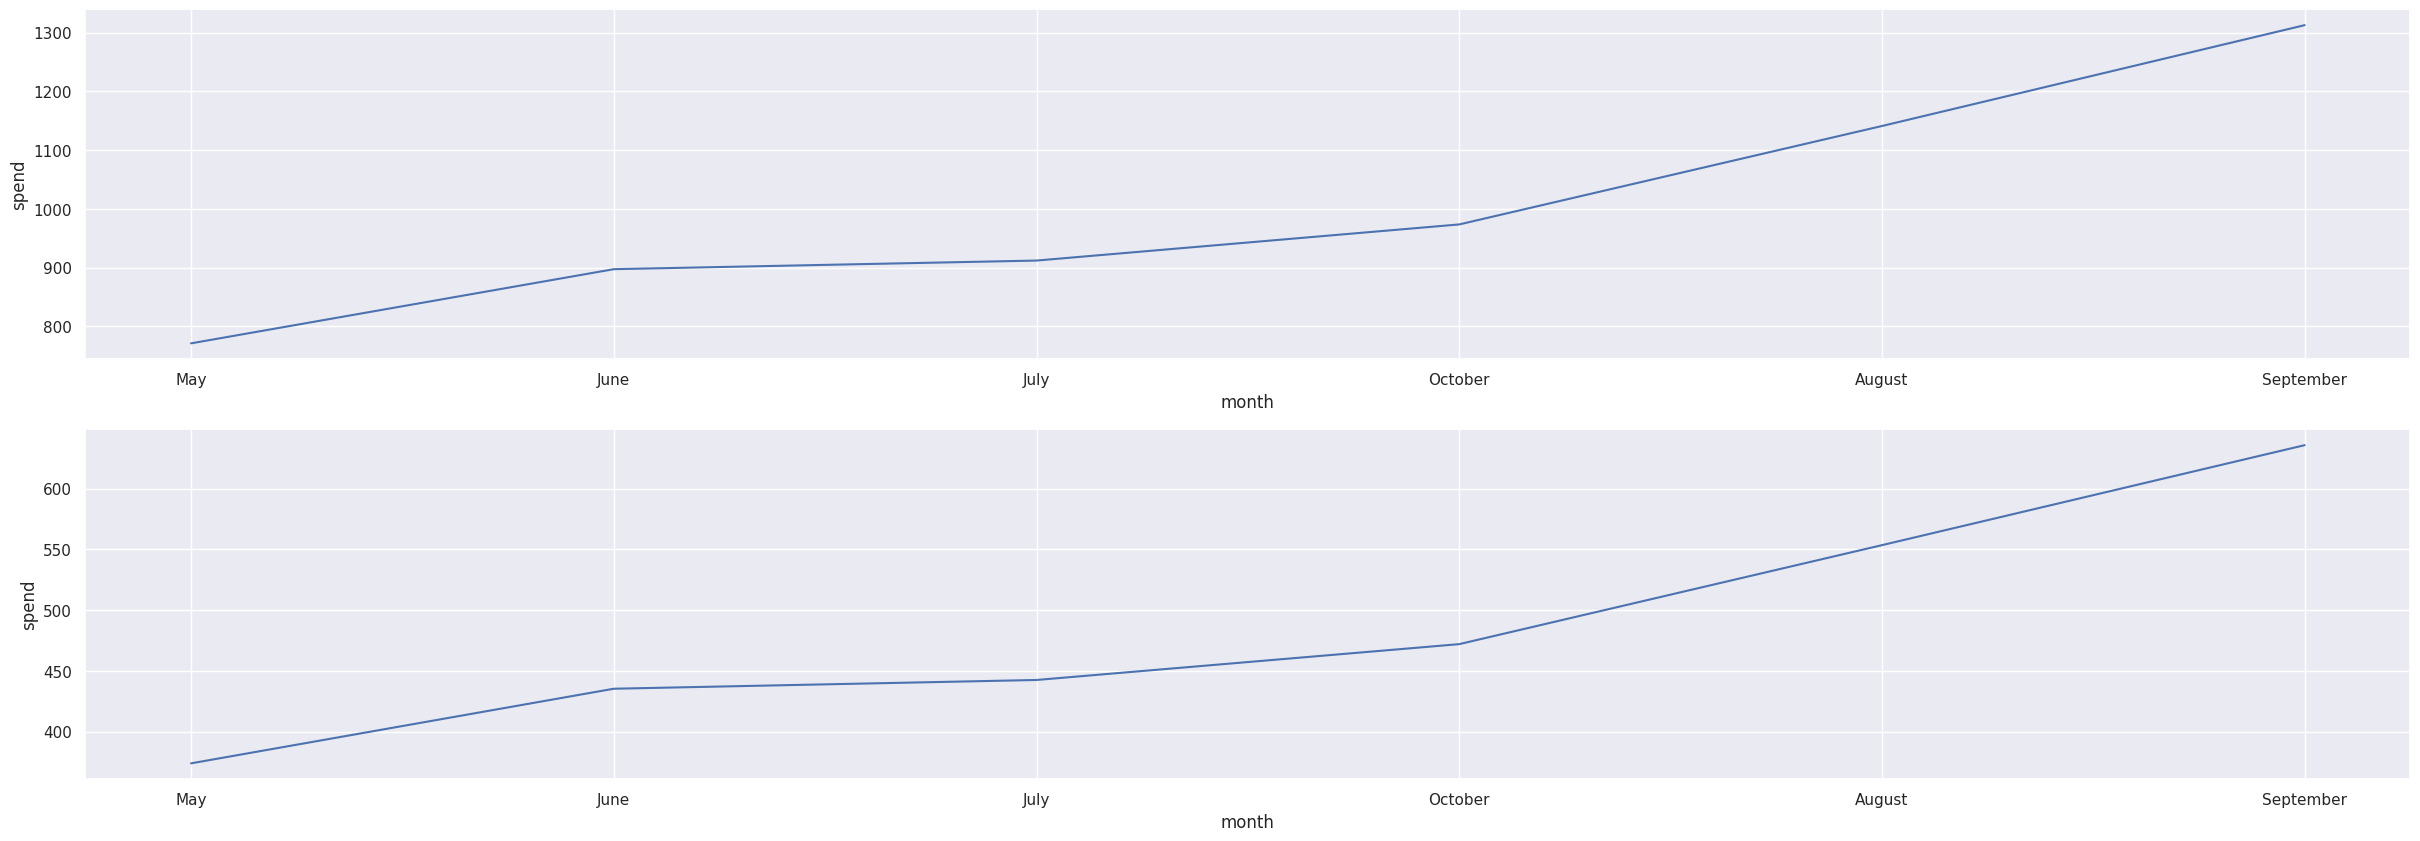

In [29]:
plt.subplot(2, 1, 1)
sns.set(rc={'figure.figsize':(30,10)})
month_spend = Credit_Card_Data.groupby(['month'], as_index=False)['spend'].mean().sort_values(by='spend')
ax = sns.lineplot(x = 'month', y= 'spend' ,data = month_spend)


plt.subplot(2, 1, 2)
sns.set(rc={'figure.figsize':(30,10)})
month_spend = Non_Credit_Card_Data.groupby(['month'], as_index=False)['spend'].mean().sort_values(by='spend')
ax = sns.lineplot(x = 'month', y= 'spend' ,data = month_spend)

From this chart we can infer that:
1) Total spend was made maximum in September, followed by August and October and that trend is similar for both credit card payments and other payment methods.

# Customer Segmentation

Category 1 - Customer Base who uses Credit Card equally as other Payment methods

In [30]:
income_desired = Combined_data[Combined_data['Income_Range'].isin(['60000-70000', '30000-40000', '40000-50000']) ]
occu_desired = income_desired[income_desired['occupation'].isin(['Salaried IT Employees', 'Salaried Other Employees']) ]
age_desired = occu_desired[occu_desired['age_group'].isin(['25-34'])]
age_desired['customer_id'].nunique()

719

Category 2 - Customer Base who uses other Payment methods more than Credit Card

In [31]:
income_desired_new = Combined_data[Combined_data['Income_Range'].isin(['70000-80000', '50000-60000', '80000-90000']) ]
occu_desired_new = income_desired_new[income_desired_new['occupation'].isin(['Business Owners', 'Freelancers']) ]
age_desired_new = occu_desired_new[occu_desired_new['age_group'].isin(['35-45', '21-24'])]
age_desired_new['customer_id'].nunique()

233

Total number of targets out of 4000 customers

In [32]:
int(age_desired['customer_id'].nunique()) + int(age_desired_new['customer_id'].nunique())

952

# Recommendations and Suggestions

## General Suggestions

1) Targeted Marketing:

Category 1 (Segment 1): Focus on targeted marketing campaigns for customers in the 25-34 age group, with income groups of 30-40k, 40-50k, and 60-70k, who are already spending equally through both Credit Cards and other payment methods. Highlight new Credit Card benefits, offers, and rewards tailored to their spending patterns.

Category 2 (Segment 2): Design specialized campaigns for customers aged 21-24 and 35-45, with income groups of 50-60k, 70-80k, and 80-90k, who are currently using other methods more than Credit Cards. Emphasize the additional advantages of using Credit Cards in bills, consumer products, healthcare, and travel.

2) Educational Campaigns:
Launch educational campaigns to create awareness about the benefits of Credit Cards, especially targeting Category 2 customers. Highlight advantages in bills, consumer products, healthcare, and travel to encourage them to shift their spending towards Credit Cards.

2) Customized Offers:
Create personalized offers for both categories based on their spending patterns. For Category 1, focus on enhancing the existing credit card benefits, and for Category 2, introduce special incentives to make Credit Cards more appealing.

## Geographic Targeting

Regional Focus:
Concentrate initial marketing efforts in Mumbai and Delhi NCR, as these cities show the highest payment activities. Tailor campaigns to resonate with the spending behavior and preferences of customers in these regions.

## Monthly & Age-Based Targeting

1) Seasonal Promotions:
Capitalize on the monthly spending trends, with a particular emphasis on promotions and offers during the peak spending months, such as September, August, and October.

2) Age-Specific Strategies:
For the 25-34 age group, leverage targeted offers and rewards to encourage them to increase their Credit Card usage.
Target the 21-24 age group with campaigns that emphasize the benefits of starting to use Credit Cards early in their financial journey.
Develop special offers for the 35-45 age group, as they show potential for increased Credit Card usage.

## Income & Occupation-Based Targeting

1) Employee Engagement:
Engage with salaried IT employees and salaried other employees from Category 1 through workplace partnerships and employer tie-ups. Offer exclusive benefits for using Credit Cards.
Target business owners and freelancers from Category 2 with tailored campaigns highlighting how a Credit Card can simplify business expenses and provide additional perks.

2) Income-Specific Promotions:
For income groups of 30,000 - 60,000 and 75,000 - 80,000, design promotions that encourage higher Credit Card usage by showcasing benefits in various spending categories.

3) Avoid Government Employees
Given the lower interest and contribution in credit payments, avoid targeting government employees for this credit card launch.

## Customer Segmentation

1) Segment-Specific Campaigns:
Tailor campaigns for each segment. For Segment 1, highlight the equal benefits of using Credit Cards. For Segment 2, emphasize the additional advantages and rewards that Credit Cards can offer compared to other payment methods.

2) Dedicated Support:
Provide dedicated customer support and assistance to both segments, ensuring a seamless transition and addressing any concerns they may have.

3) Feedback Mechanism:
Establish a feedback mechanism to continuously improve Credit Card offerings based on customer preferences and spending behaviors.
By adopting these strategies, the bank can effectively target and convert customers from both segments, maximizing the success of the new line of Credit Cards.